In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#master___2018.07.24-2*
df = pd.read_csv("../classifier_compression/logs/master___2018.07.24-235532/arch_space.csv")
df

,Unnamed: 0,File,NNZ,MACs,Top1
0,0,BEST_adc_episode_117_checkpoint.pth.tar,12296696,263284916,90.54
1,1,BEST_adc_episode_013_checkpoint.pth.tar,10608175,231102406,89.66
2,2,BEST_adc_episode_001_checkpoint.pth.tar,3805850,83514494,10.00
3,3,BEST_adc_episode_002_checkpoint.pth.tar,1896800,39151400,10.00
4,4,BEST_adc_episode_124_checkpoint.pth.tar,12023704,256894642,90.61
5,5,BEST_adc_episode_025_checkpoint.pth.tar,9965512,238710106,90.10
6,6,BEST_adc_episode_004_checkpoint.pth.tar,6563187,111504654,23.13
7,7,BEST_adc_episode_010_checkpoint.pth.tar,7941730,212751472,89.29
8,8,BEST_adc_episode_136_checkpoint.pth.tar,12840751,273482956,90.68
9,9,BEST_adc_episode_005_checkpoint.pth.tar,8555297,185852876,81.59


In [72]:
df2 = pd.read_csv("../classifier_compression/logs/master___2018.07.24-232342/arch_space.csv")
df2
df3 = pd.read_csv("../classifier_compression/logs/master___2018.07.24-225916/arch_space.csv")
df3
df4 = pd.read_csv("../classifier_compression/logs/master___2018.07.25-205658/arch_space.csv")

,Unnamed: 0,File,NNZ,MACs,Top1
0,0,BEST_adc_episode_003_checkpoint.pth.tar,1880678,40981916,10.00
1,1,BEST_adc_episode_001_checkpoint.pth.tar,3243400,75744988,10.01
2,2,BEST_adc_episode_006_checkpoint.pth.tar,4893669,130690152,26.48
3,3,BEST_adc_episode_114_checkpoint.pth.tar,8249014,161158222,78.21
4,4,BEST_adc_episode_008_checkpoint.pth.tar,5780922,158955054,71.42
5,5,BEST_adc_episode_108_checkpoint.pth.tar,7041071,176417822,80.34
6,6,BEST_adc_episode_044_checkpoint.pth.tar,9410752,227796580,86.64
7,7,BEST_adc_episode_077_checkpoint.pth.tar,6231760,178635022,81.33


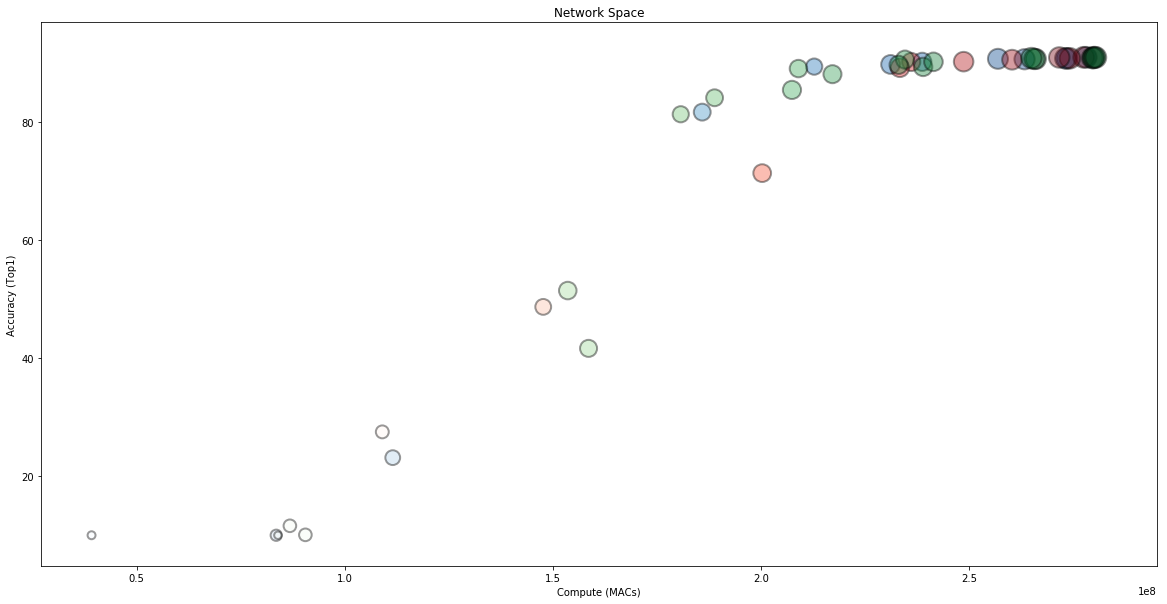

In [76]:
def add_results(df, plt, cmap):
    # create data
    x = df['MACs'].tolist()
    y = df['Top1'].tolist()
    z = df['NNZ'].tolist()
    z = [n/30000 for n in z]
    plt.scatter(x, y, s=z, c=x, cmap=cmap, alpha=0.4, edgecolors="black", linewidth=2)

# Change color with c and alpha. I map the color to the X axis value.
plt.figure(figsize=(20,10))
add_results(df, plt, cmap="Blues")
add_results(df2, plt, cmap="Reds")
add_results(df3, plt, cmap="Greens")

# Add titles (main and on axis)
plt.xlabel("Compute (MACs)")
plt.ylabel("Accuracy (Top1)")
plt.title("Network Space")
plt.show()

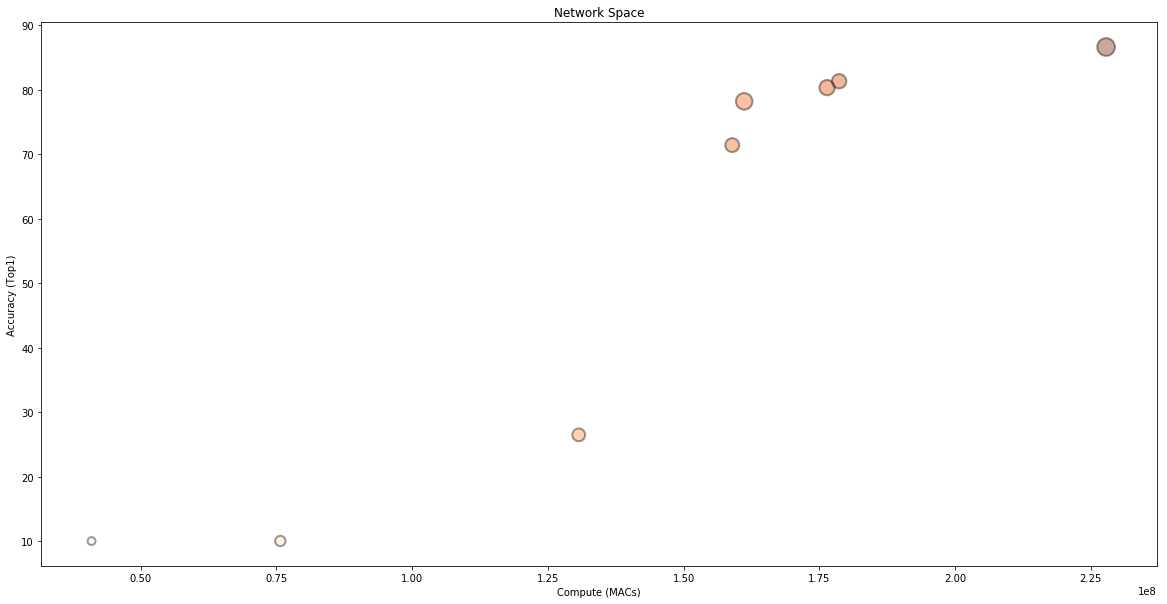

In [77]:
# Change color with c and alpha. I map the color to the X axis value.
plt.figure(figsize=(20,10))

add_results(df4, plt, cmap="Oranges")

# Add titles (main and on axis)
plt.xlabel("Compute (MACs)")
plt.ylabel("Accuracy (Top1)")
plt.title("Network Space")
plt.show()

In [78]:
df4

,Unnamed: 0,File,NNZ,MACs,Top1
0,0,BEST_adc_episode_003_checkpoint.pth.tar,1880678,40981916,10.00
1,1,BEST_adc_episode_001_checkpoint.pth.tar,3243400,75744988,10.01
2,2,BEST_adc_episode_006_checkpoint.pth.tar,4893669,130690152,26.48
3,3,BEST_adc_episode_114_checkpoint.pth.tar,8249014,161158222,78.21
4,4,BEST_adc_episode_008_checkpoint.pth.tar,5780922,158955054,71.42
5,5,BEST_adc_episode_108_checkpoint.pth.tar,7041071,176417822,80.34
6,6,BEST_adc_episode_044_checkpoint.pth.tar,9410752,227796580,86.64
7,7,BEST_adc_episode_077_checkpoint.pth.tar,6231760,178635022,81.33


In [92]:
# Relative import of code from distiller, w/o installing the package
import os
import sys
import torch
module_path = os.path.abspath(os.path.join('..', '..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import distiller
import models
import apputils

In [101]:
dataset = 'cifar10'
dummy_input = torch.randn(1, 3, 32, 32)
arch = 'vgg16_cifar'
checkpoint_file = "../classifier_compression/logs/master___2018.07.25-205658/BEST_adc_episode_044_checkpoint.pth.tar" 

model = models.create_model(pretrained=False, dataset=dataset, arch=arch)
apputils.load_checkpoint(model, checkpoint_file);

In [99]:
t = distiller.weights_sparsity_summary(model)

In [100]:
t

,Name,Shape,NNZ (dense),NNZ (sparse),Cols (%),Rows (%),Ch (%),2D (%),3D (%),Fine (%),Std,Mean,Abs-Mean
0,features.module.0.weight,"(61, 3, 3, 3)",1647,1647,0,0,0.0,0.0,0.0,0.0,0.26,-2.40e-03,1.90e-01
1,features.module.2.weight,"(61, 61, 3, 3)",33489,33489,0,0,0.0,0.0,0.0,0.0,0.08,-1.19e-02,5.79e-02
2,features.module.5.weight,"(116, 61, 3, 3)",63684,63684,0,0,0.0,0.0,0.0,0.0,0.07,-8.42e-03,5.25e-02
3,features.module.7.weight,"(112, 116, 3, 3)",116928,116928,0,0,0.0,0.0,0.0,0.0,0.06,-1.06e-02,4.48e-02
4,features.module.10.weight,"(184, 112, 3, 3)",185472,185472,0,0,0.0,0.0,0.0,0.0,0.05,-6.52e-03,3.98e-02
5,features.module.12.weight,"(177, 184, 3, 3)",293112,293112,0,0,0.0,0.0,0.0,0.0,0.04,-5.51e-03,3.21e-02
6,features.module.14.weight,"(209, 177, 3, 3)",332937,332937,0,0,0.0,0.0,0.0,0.0,0.04,-6.98e-03,2.94e-02
7,features.module.17.weight,"(487, 209, 3, 3)",916047,916047,0,0,0.0,0.0,0.0,0.0,0.02,-2.65e-03,1.72e-02
8,features.module.19.weight,"(487, 487, 3, 3)",2134521,2134521,0,0,0.0,0.0,0.0,0.0,0.01,-1.06e-03,1.09e-02
9,features.module.21.weight,"(447, 487, 3, 3)",1959201,1959201,0,0,0.0,0.0,0.0,0.0,0.01,-9.06e-04,9.68e-03


In [102]:
checkpoint_file = "../classifier_compression/logs/master___2018.07.25-205658/BEST_adc_episode_008_checkpoint.pth.tar" 

model = models.create_model(pretrained=False, dataset=dataset, arch=arch)
apputils.load_checkpoint(model, checkpoint_file);
distiller.weights_sparsity_summary(model)

,Name,Shape,NNZ (dense),NNZ (sparse),Cols (%),Rows (%),Ch (%),2D (%),3D (%),Fine (%),Std,Mean,Abs-Mean
0,features.module.0.weight,"(42, 3, 3, 3)",1134,1134,0,0,0.0,0.0,0.0,0.0,0.29,-6.32e-03,2.22e-01
1,features.module.2.weight,"(42, 42, 3, 3)",15876,15876,0,0,0.0,0.0,0.0,0.0,0.10,-1.46e-02,7.41e-02
2,features.module.5.weight,"(104, 42, 3, 3)",39312,39312,0,0,0.0,0.0,0.0,0.0,0.08,-9.57e-03,6.07e-02
3,features.module.7.weight,"(93, 104, 3, 3)",87048,87048,0,0,0.0,0.0,0.0,0.0,0.06,-1.11e-02,4.74e-02
4,features.module.10.weight,"(244, 93, 3, 3)",204228,204228,0,0,0.0,0.0,0.0,0.0,0.05,-6.46e-03,3.85e-02
5,features.module.12.weight,"(161, 244, 3, 3)",353556,353556,0,0,0.0,0.0,0.0,0.0,0.04,-5.12e-03,3.07e-02
6,features.module.14.weight,"(237, 161, 3, 3)",343413,343413,0,0,0.0,0.0,0.0,0.0,0.04,-6.94e-03,2.89e-02
7,features.module.17.weight,"(341, 237, 3, 3)",727353,727353,0,0,0.0,0.0,0.0,0.0,0.02,-2.80e-03,1.83e-02
8,features.module.19.weight,"(311, 341, 3, 3)",954459,954459,0,0,0.0,0.0,0.0,0.0,0.02,-1.36e-03,1.24e-02
9,features.module.21.weight,"(369, 311, 3, 3)",1032831,1032831,0,0,0.0,0.0,0.0,0.0,0.01,-1.17e-03,1.05e-02
